In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gstatsMCMC import Topography
from gstatsMCMC import MCMC
import gstatsim as gs
import skgstat as skg
from gstatsMCMC import gstatsim_custom as gsm
import cmocean

In [20]:
df = pd.read_csv('RutfordDataGridded.csv')

# create a grid of x and y coordinates
x_uniq = np.unique(df.x)
y_uniq = np.unique(df.y)

xmin = np.min(x_uniq)
xmax = np.max(x_uniq)
ymin = np.min(y_uniq)
ymax = np.max(y_uniq)

cols = len(x_uniq)
rows = len(y_uniq)

resolution = 500

xx, yy = np.meshgrid(x_uniq, y_uniq)

# load other data
dhdt = df['dhdt'].values.reshape(xx.shape)
smb = df['smb'].values.reshape(xx.shape)
velx = df['velx'].values.reshape(xx.shape)
vely = df['vely'].values.reshape(xx.shape)
bedmap_mask = df['bedmap_mask'].values.reshape(xx.shape)
bedmachine_thickness = df['bedmachine_thickness'].values.reshape(xx.shape)
bedmap_surf = df['bedmap_surf'].values.reshape(xx.shape)
highvel_mask = df['highvel_mask'].values.reshape(xx.shape)
bedmap_bed = df['bedmap_bed'].values.reshape(xx.shape)
bedmachine_bed = bedmap_surf - bedmachine_thickness

In [25]:
n = 10
sgs_beds=[]
for i in range(n):
    file_name='Rutford_sgs_bed_'+str(i)+'.txt'
    sgs_bed = np.loadtxt(file_name)
    thickness = bedmap_surf - sgs_bed
    sgs_bed = np.where((thickness<=0)&(bedmap_mask==1), bedmap_surf-1, sgs_bed)
    sgs_beds.append(sgs_bed)
    
# convert list → 3D numpy array
sgs_beds = np.stack(sgs_beds)


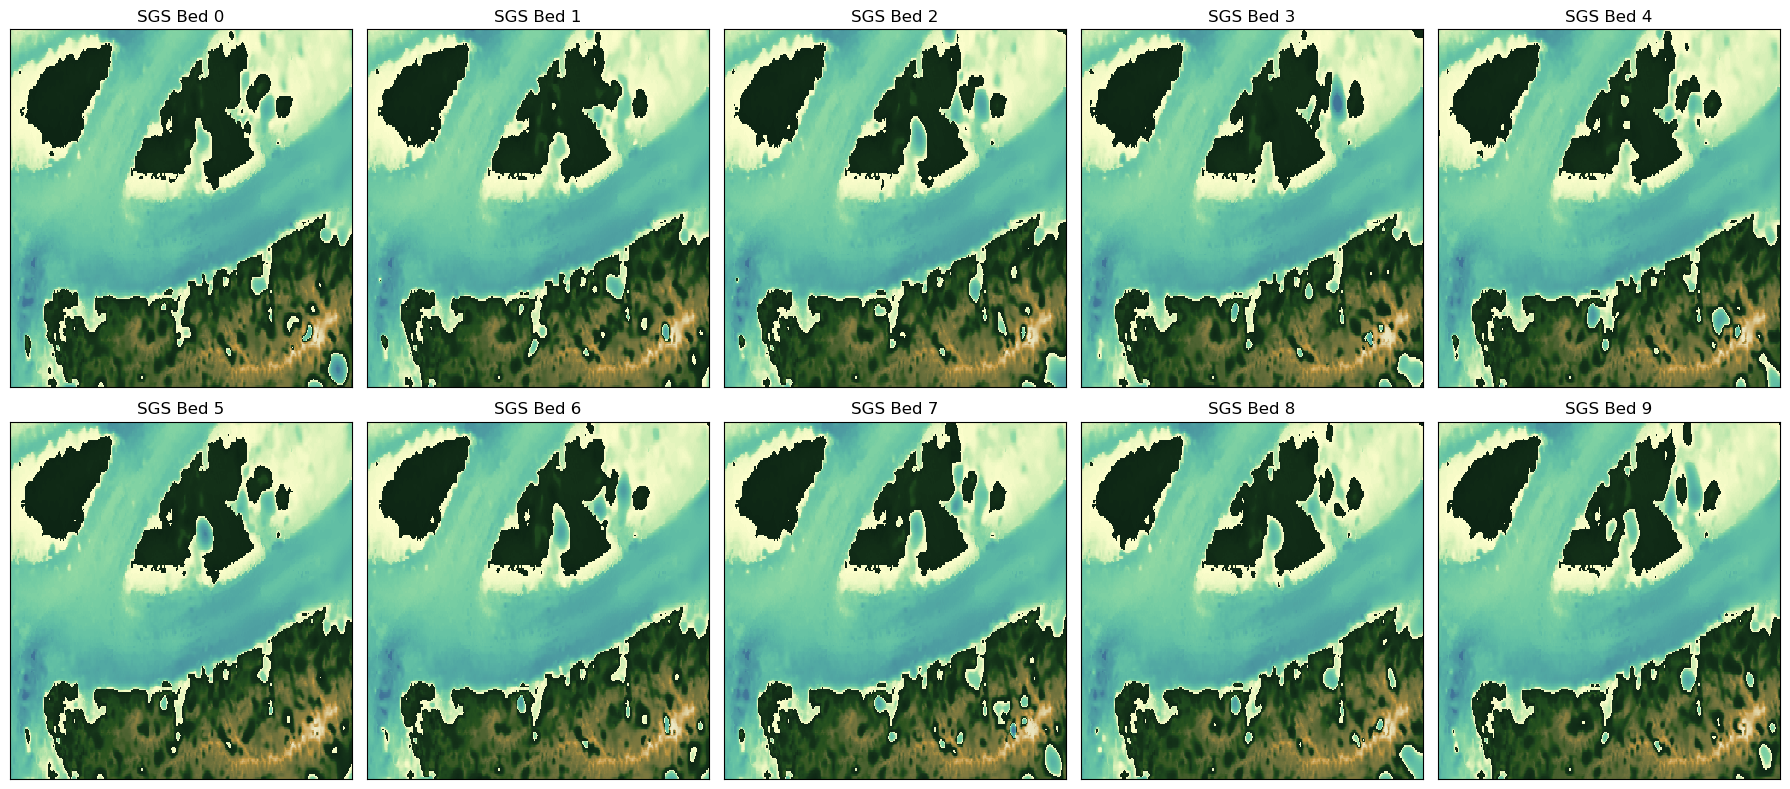

In [26]:
norm=plt.Normalize(vmin=-5000, vmax=5000)

fig, axes = plt.subplots(2, 5, figsize=(18, 8))  # adjust layout as needed
axes = axes.flatten()

for i in range(n):
    ax=axes[i]
    cmap = ax.pcolormesh(xx / 1000, yy / 1000, sgs_beds[i], cmap='cmo.topo', shading='auto', norm=norm)
    axes[i].set_title(f'SGS Bed {i}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [27]:
std_bed = np.std(sgs_beds, axis=0)


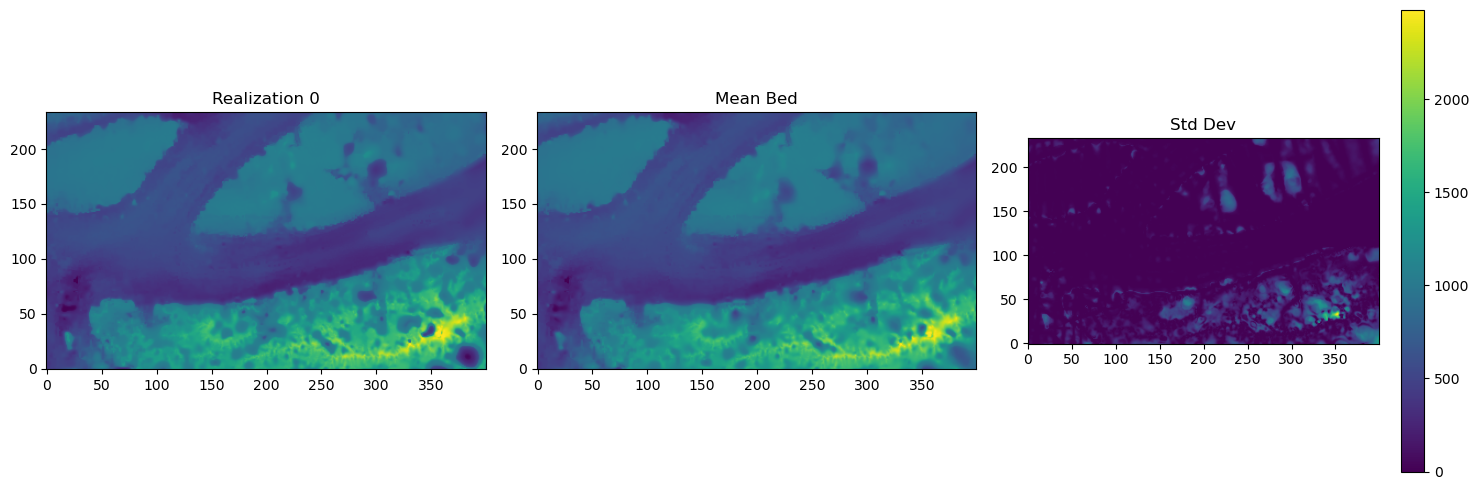

In [28]:
mean_bed = sgs_beds.mean(axis=0)
std_bed  = sgs_beds.std(axis=0)

fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax[0].imshow(sgs_beds[0], origin='lower')
ax[0].set_title('Realization 0')

ax[1].imshow(mean_bed, origin='lower')
ax[1].set_title('Mean Bed')

im = ax[2].imshow(std_bed, origin='lower')
ax[2].set_title('Std Dev')

fig.colorbar(im, ax=ax[2])
plt.tight_layout()
plt.show()


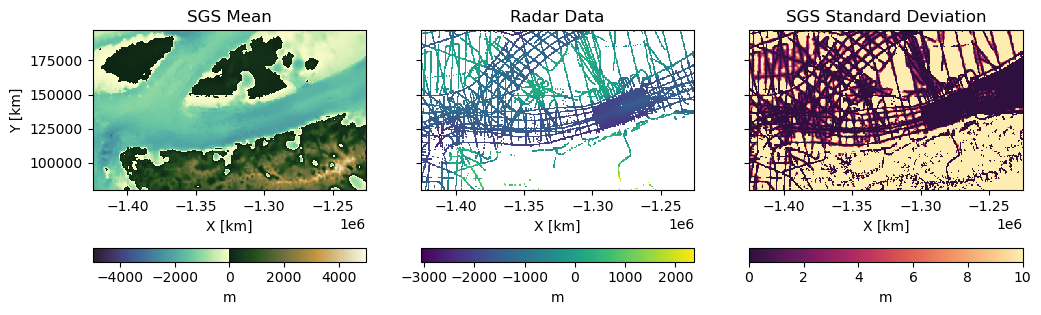

In [52]:
mean_bed = sgs_beds.mean(axis=0)
std_bed  = sgs_beds.std(axis=0)

fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(xx, yy, mean_bed, cmap='cmo.topo', shading='auto', norm=norm)
ax.axis('scaled')
ax.set_title('SGS Mean')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

ax = axs[1]
im = ax.pcolormesh(xx, yy, df['bed'].values.reshape(xx.shape))
ax.axis('scaled')
ax.set_title('Radar Data')
ax.set_xlabel('X [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

ax = axs[2]
im = ax.pcolormesh(xx, yy, std_bed, vmax=10, cmap='cmo.matter_r')
ax.axis('scaled')
ax.set_title('SGS Standard Deviation')
ax.set_xlabel('X [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

plt.show()

In [41]:
std_bed0 = np.std(sgs_beds, axis=0)

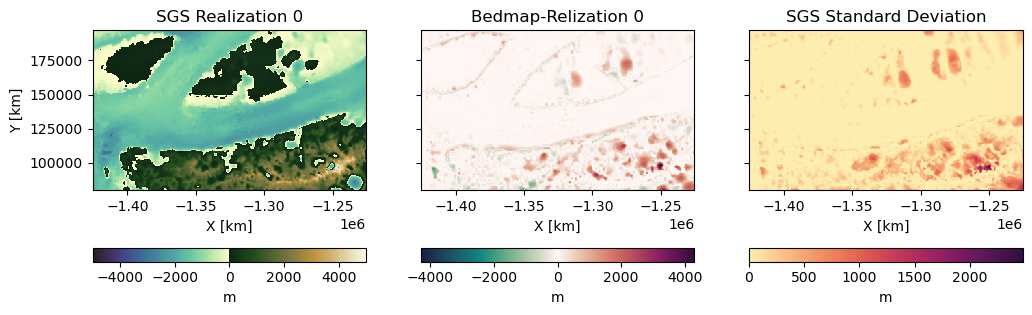

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(12,5), sharey=True)
ax = axs[0]
im = ax.pcolormesh(xx, yy, sgs_beds[0], cmap='cmo.topo', shading='auto', norm=norm)
ax.axis('scaled')
ax.set_title('SGS Realization 0')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

ax = axs[1]
im = ax.pcolormesh(xx, yy, bedmap_bed-mean_bed, vmax=4300, vmin=-4300, cmap='cmo.curl')
ax.axis('scaled')
ax.set_title('Bedmap-Relization 0')
ax.set_xlabel('X [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

ax = axs[2]
im = ax.pcolormesh(xx, yy, std_bed0, cmap='cmo.matter')
ax.axis('scaled')
ax.set_title('SGS Standard Deviation')
ax.set_xlabel('X [km]')
plt.colorbar(im, ax=ax, label='m', orientation='horizontal')

plt.show()